# Simulating Grover's Search Algorithm with 2 Qubits

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Define the zero and one vectors
Define the initial state $\psi$

In [22]:
zero = np.matrix([[1],[0]]);
one = np.matrix([[0],[1]]);

psi = np.kron(zero,zero);
print(psi)

[[1]
 [0]
 [0]
 [0]]


Define the gates we will use:

$
\text{Id} = \begin{pmatrix} 
1 & 0  \\
0 & 1  
\end{pmatrix},
\quad
X = \begin{pmatrix} 
0 & 1   \\
1 & 0  
\end{pmatrix},
\quad
Z = \begin{pmatrix} 
1 &  0 \\
0 & -1 
\end{pmatrix},
\quad
H = \frac{1}{\sqrt{2}}\begin{pmatrix} 
1 & 1   \\
1 & -1  
\end{pmatrix},
\quad
\text{CNOT} = \begin{pmatrix} 
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\  
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix},
\quad
CZ = (\text{Id} \otimes H) \text{ CNOT } (\text{Id} \otimes H) 
$

In [23]:
Id = np.matrix([[1,0],[0,1]]);
X = np.matrix([[0,1],[1,0]]);
Z = np.matrix([[1,0],[0,-1]]);
H = np.sqrt(0.5) * np.matrix([[1,1],[1,-1]]);

CNOT = np.matrix([[1,0,0,0],[0,1,0,0],[0,0,0,1],[0,0,1,0]]);
CZ = np.kron(Id,H).dot(CNOT).dot(np.kron(Id,H));
print(CZ)

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]


Define the oracle for Grover's algorithm  (take search answer to be "10")

$
\text{oracle} = \begin{pmatrix} 
1 & 0 & 0 & 0  \\
0 & 1 & 0 & 0 \\
0 & 0 & -1 & 0 \\
0 & 0 & 0 & 1
\end{pmatrix}
= (Z \otimes \text{Id})  CZ
$

Use different combinations of $Z \otimes \text{Id}$ to change where search answer is. 

In [24]:
oracle = np.kron(Z,Id).dot(CZ);
print(oracle)

[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  1.]]


Act the H gates on the input vector and apply the oracle 

In [26]:
psi0 = np.kron(H,H).dot(psi);
psi1 = oracle.dot(psi0);
print(psi1)

[[ 0.5]
 [ 0.5]
 [-0.5]
 [ 0.5]]


Remember that when we measure the result ("00", "01", "10", "11") is chosen randomly with probabilities given by the vector elements squared.

In [27]:
print(np.multiply(psi1,psi1))

[[ 0.25]
 [ 0.25]
 [ 0.25]
 [ 0.25]]


There is no difference between any of the probabilities. It's still just a 25% chance of getting the right answer. 

We need some of gates after the oracle before measuring to converge on the right answer.  

These gates do the operation $W = \frac{1}{2}\begin{pmatrix} 
-1 & 1 & 1 & 1  \\
1 & -1 & 1 & 1 \\
1 & 1 & -1 & 1 \\
1 & 1 & 1 & -1
\end{pmatrix}
=
(H \otimes H)(Z \otimes Z) CZ (H \otimes H)
$

Notice that if the matrix W is multiplied by the vector after the oracle, W $\frac{1}{2}\begin{pmatrix} 
1 \\
1 \\
-1 \\
1
\end{pmatrix} 
= \begin{pmatrix} 
0 \\
0 \\
1 \\
0
\end{pmatrix}  $,
every vector element decreases, except the correct answer element which increases. This would be true if if we chose a different place for the search result originally.

In [29]:
W = np.kron(H,H).dot(np.kron(Z,Z)).dot(CZ).dot(np.kron(H,H));
print(W)

[[-0.5  0.5  0.5  0.5]
 [ 0.5 -0.5  0.5  0.5]
 [ 0.5  0.5 -0.5  0.5]
 [ 0.5  0.5  0.5 -0.5]]


In [31]:
psif = W.dot(psi1);
print(np.multiply(psif,psif))

[[  1.23259516e-32]
 [  3.08148791e-33]
 [  1.00000000e+00]
 [  3.08148791e-33]]


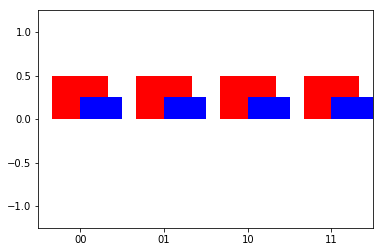

In [44]:
x = [0,1,2,3];
xb = [0.25,1.25,2.25,3.25];
labels=['00', '01', '10', '11'];
plt.axis([-0.5,3.5,-1.25,1.25]);
plt.xticks(x,labels);
plt.bar(x, np.ravel(psi0), 1/1.5, color="red");
plt.bar(xb, np.ravel(np.multiply(psi0,psi0)), 1/2., color="blue");

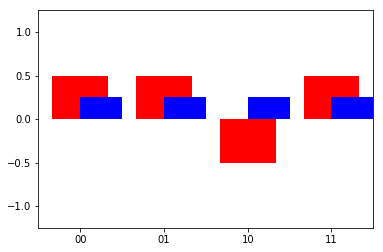

In [45]:
labels=['00', '01', '10', '11'];
plt.axis([-0.5,3.5,-1.25,1.25]);
plt.xticks(x,labels);
plt.bar(x, np.ravel(psi1), 1/1.5, color="red");
plt.bar(xb, np.ravel(np.multiply(psi1,psi1)), 1/2., color="blue");

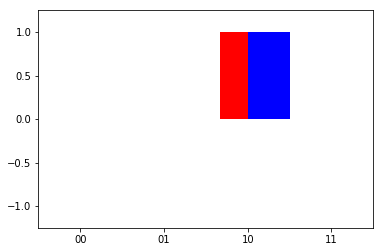

In [46]:
labels=['00', '01', '10', '11'];
plt.axis([-0.5,3.5,-1.25,1.25]);
plt.xticks(x,labels);
plt.bar(x, np.ravel(psif), 1/1.5, color="red");
plt.bar(xb, np.ravel(np.multiply(psif,psif)), 1/2., color="blue");